<a href="https://colab.research.google.com/github/2303A51062/23CSBTB29/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [4]:
ol_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/diabetes.csv", header=None, names=ol_names) # Changed col_names to ol_names

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [7]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [10]:
# Load the dataset ensuring the first row isn't mistakenly taken as data
# Changed 'col_names' to 'ol_names' to match the variable defined earlier
pima = pd.read_csv("/content/diabetes.csv", header=0, names=ol_names)

# Ensure all feature columns contain numerical data before splitting
for col in feature_cols: # Loop through each feature column
    pima[col] = pd.to_numeric(pima[col], errors='coerce') # Convert to numeric, replacing errors with NaN

#split dataset in features and target variable
# Now X will be created with numeric values only
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
# Now X_train and X_test will inherit the numeric types
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Assuming 'clf' was defined and imported properly, but it was missing in the context
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier if not already
clf = DecisionTreeClassifier() # Instantiate the classifier if it wasn't before

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6623376623376623


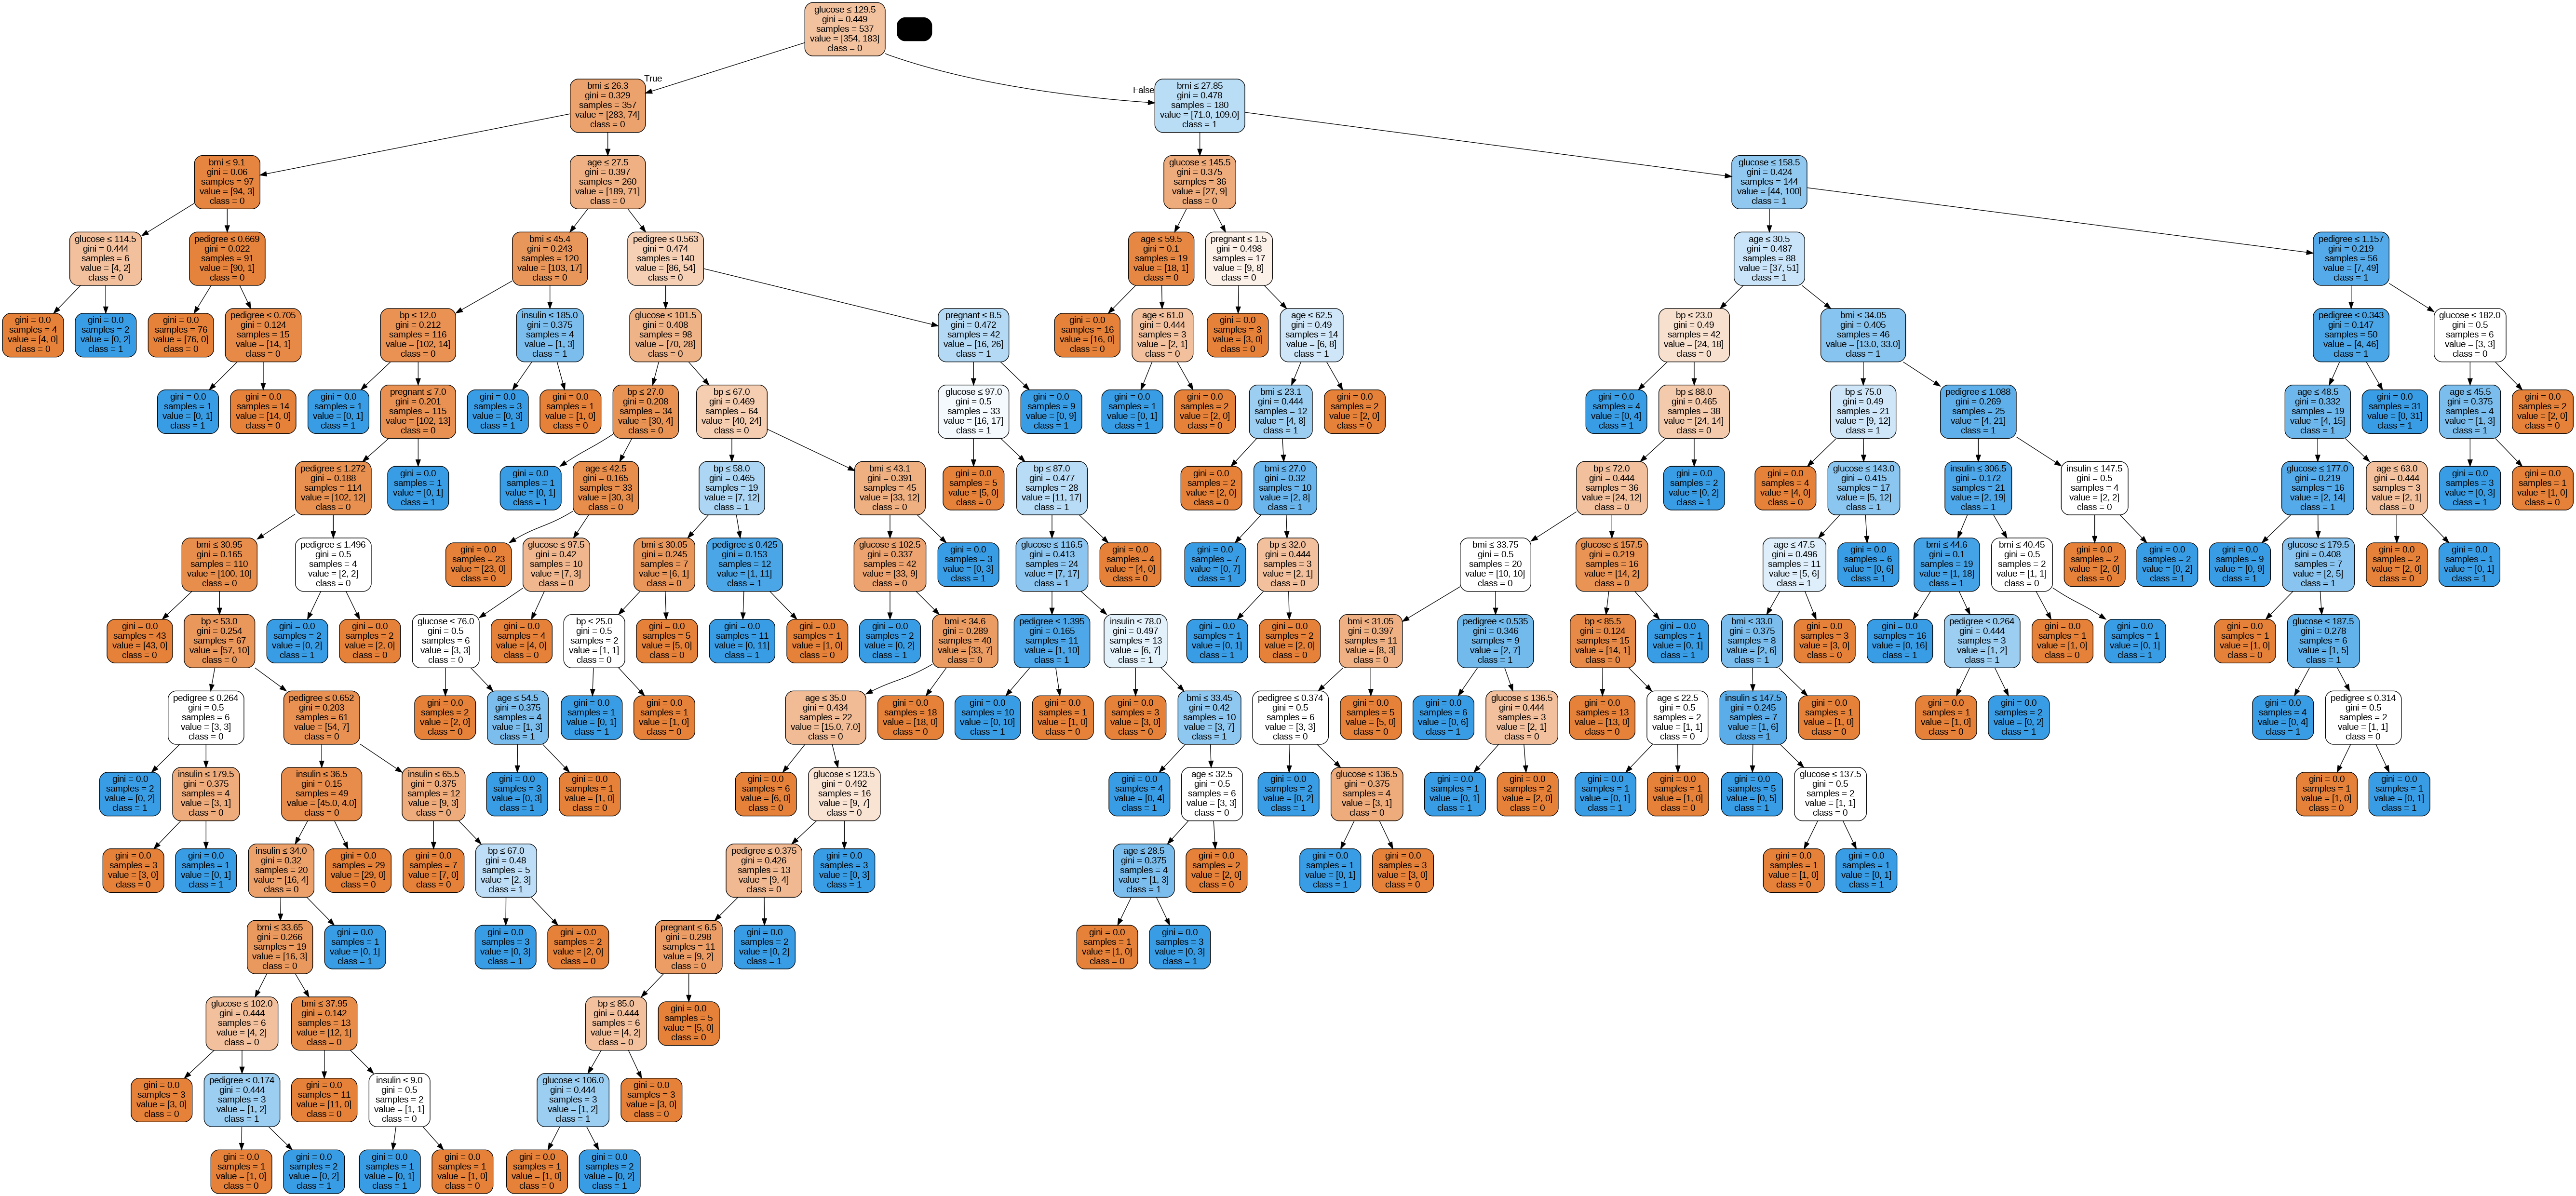

In [12]:
# Instead of:
# from sklearn.externals.six import StringIO
# Use this:
from io import StringIO # Import StringIO from io module directly
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706
